In [817]:
import random, matplotlib.pyplot as plt, seaborn, math, statistics

In [759]:
%matplotlib inline

In [760]:
n = 1000

In [761]:
heads_or_tails = [0,1]
flip_count_tails = []
flip_count_heads = []
def flip(n):
    for _ in range(n):
        choice = random.choice(heads_or_tails)
        if choice == 0:
            flip_count_heads.append(0)
            flip_count_tails.append(1)
        else:
            flip_count_heads.append(1)
            flip_count_tails.append(0)
        

In [762]:
flip(n)

In [763]:
count_heads = []

In [764]:
count_tails = []

In [765]:
for i in range(math.floor(math.log2(n))):
    count_tails.append(sum(flip_count_tails[:2**i]))

In [766]:
for i in range(math.floor(math.log2(n))):
    count_heads.append(sum(flip_count_heads[:2**i]))

In [767]:
count_heads.append(sum(flip_count_heads))

In [768]:
count_tails.append(sum(flip_count_tails))

In [769]:
count_heads

[0, 1, 3, 5, 9, 16, 28, 64, 129, 503]

In [770]:
count_tails

[1, 1, 1, 3, 7, 16, 36, 64, 127, 497]

In [771]:
difference = []

In [772]:
for i in range(len(count_heads)):
    difference.append(count_heads[i]-count_tails[i])

In [773]:
difference

[-1, 0, 2, 2, 2, 0, -8, 0, 2, 6]

In [774]:
x_plot = [i for i in range(1,len(count_tails))]
x_plot.append("last value")

In [775]:
x_plot

[1, 2, 3, 4, 5, 6, 7, 8, 9, 'last value']

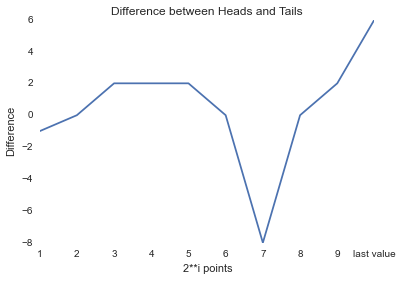

In [776]:
x1 = x_plot
y1 = difference
plt.plot(y1)
plt.xticks(range(len(x_plot)), x_plot)
plt.xlabel("2**i points")
plt.ylabel("Difference")
plt.title("Difference between Heads and Tails")
plt.show()

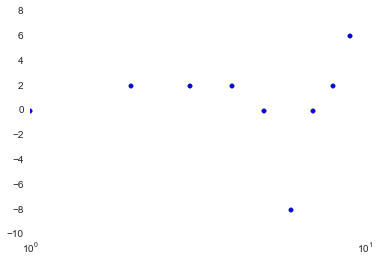

In [777]:
plt.scatter(range(len(x_plot)),difference)
plt.xscale('log')
plt.show()

In [778]:
ratio = []

In [779]:
for i in range(len(count_heads)):
    try:
        ratio.append(count_heads[i]/count_tails[i])
    except ZeroDivisionError:
        ratio.append(1)

In [780]:
ratio

[0.0,
 1.0,
 3.0,
 1.6666666666666667,
 1.2857142857142858,
 1.0,
 0.7777777777777778,
 1.0,
 1.015748031496063,
 1.012072434607646]

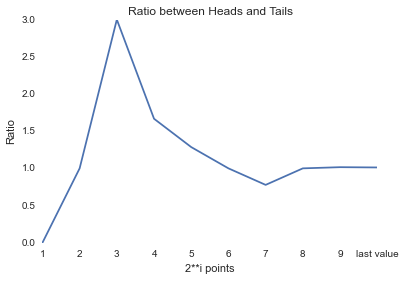

In [781]:
x1 = x_plot
y1 = ratio
plt.plot(y1)
plt.xticks(range(len(x_plot)), x_plot)
plt.xlabel("2**i points")
plt.ylabel("Ratio")
plt.title("Ratio between Heads and Tails")
plt.show()

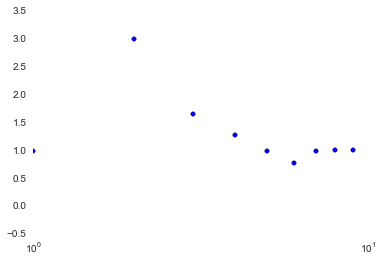

In [782]:
plt.scatter(range(len(x_plot)),ratio)
plt.xscale('log')
plt.show()

In [783]:

def flip_n(n):
    for _ in range(n):
        choice = random.choice(heads_or_tails)
        if choice == 0:
            head_list_i.append(0)
            tail_list_i.append(1)
        else:
            head_list_i.append(1)
            tail_list_i.append(0)

In [784]:
list_of_trials_heads = []
list_of_trials_tails = []
n = 2**16
for i in range(20):
    head_list_i = []
    tail_list_i = []
    
    flip_n(n)
    
    list_of_trials_heads.append(head_list_i)
    list_of_trials_tails.append(tail_list_i)
    

In [793]:
mean_ratios = []
for list_number in range(len(list_of_trials_heads)):
    for i in range(math.floor(math.log2(n))):
        try:
            mean_ratios.append(sum(list_of_trials_heads[list_number][:2**i])/sum(list_of_trials_tails[list_number][:2**i]))
        except ZeroDivisionError:
            mean_ratios.append(1)

In [821]:
#I don't think this is actually correct. It's taking the average within each list of 16 ratios, 
#Not, taking the ith element from each list of 16 ratios and averaging them
ratio_list = []
for i in range(len(list_of_trials_heads)):
    ratio_list.append(sum(mean_ratios[math.floor(math.log2(n))*i:math.floor(math.log2(n))*(i+1)])/math.floor(math.log2(n)))

In [822]:
#This is closer to being correct, but couldn't quite get it
#ratio_list = []
#for i in range(len(list_of_trials_heads)):
#    for item in range(math.floor(math.log2(n))):
#        ratio_list.append(statistics.mean(mean_ratios[math.floor(math.log2(n))*i:math.floor(math.log2(n))*(i+1)][item]))/math.floor(math.log2(n))
                          


In [823]:
len(ratio_list)
       

20

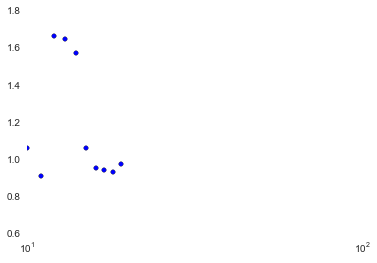

In [824]:
plt.scatter(range(len(ratio_list)),ratio_list)
plt.xscale('log')
plt.show()

In [832]:
stdev_list = []
for i in range(len(list_of_trials_heads)):
    stdev_list.append(statistics.stdev(mean_ratios[math.floor(math.log2(n))*i:math.floor(math.log2(n))*(i+1)])/math.floor(math.log2(n)))

In [833]:
stdev_list


[0.03303158807347358,
 0.01423239689865266,
 0.023672134049132963,
 0.049984438653938625,
 0.021543651657298754,
 0.018769839009678,
 0.03270782371070654,
 0.020350585245795246,
 0.017948273742023516,
 0.021192659664759538,
 0.0378042625046624,
 0.02523949768450468,
 0.10851829724186983,
 0.09788591977358155,
 0.0986878038564513,
 0.0114020912628792,
 0.018108491948035262,
 0.025767126365027742,
 0.008503352432498414,
 0.03755888694732502]

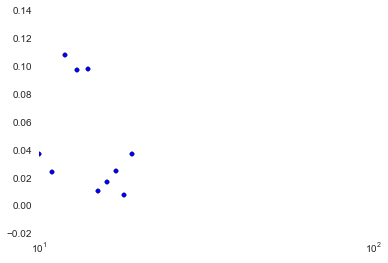

In [835]:
plt.scatter(range(len(ratio_list)),stdev_list)
plt.xscale('log')
plt.show()

In [ ]:
# As noted above, I don't think these are correct. It is data, but not the desired data


In [837]:
list_of_trials_heads = []
list_of_trials_tails = []
n = 100000
for i in range(100):
    head_list_i = []
    tail_list_i = []
    
    flip_n(n)
    
    list_of_trials_heads.append(head_list_i)
    list_of_trials_tails.append(tail_list_i)

In [ ]:
ratio_list = []
for i in range(len(list_of_trials_heads)):
    ratio_list.append(sum(mean_ratios[math.floor(math.log2(n))*i:math.floor(math.log2(n))*(i+1)])/math.floor(math.log2(n)))


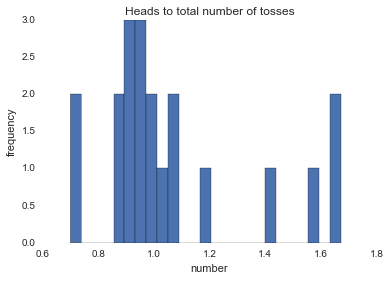

In [841]:
plt.hist(ratio_list, bins=25)
plt.xlabel("number")
plt.ylabel("frequency")
plt.title("Heads to total number of tosses")
plt.show()

In [843]:
list_of_trials_heads = []
list_of_trials_tails = []
n = 100000
for i in range(1000):
    head_list_i = []
    tail_list_i = []
    
    flip_n(n)
    
    list_of_trials_heads.append(head_list_i)
    list_of_trials_tails.append(tail_list_i)

In [845]:
ratio_list1 = []
for i in range(len(list_of_trials_heads)):
    ratio_list1.append(sum(mean_ratios[math.floor(math.log2(n))*i:math.floor(math.log2(n))*(i+1)])/math.floor(math.log2(n)))


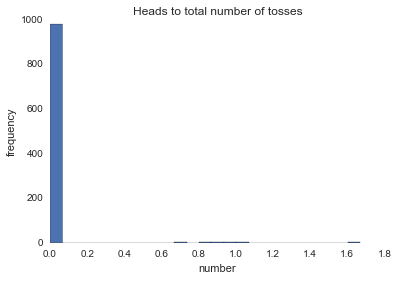

In [846]:
plt.hist(ratio_list1, bins=25)
plt.xlabel("number")
plt.ylabel("frequency")
plt.title("Heads to total number of tosses")
plt.show()

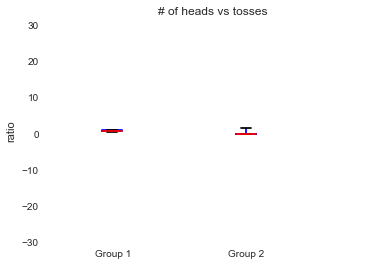

In [847]:
group1 = ratio_list
group2 = ratio_list1


plt.boxplot([group1, group2])
ymin, ymax = plt.ylim()
plt.ylim(ymin - 30, ymax + 30)
plt.title("# of heads vs tosses")
plt.ylabel("ratio")
plt.xticks(range(1,4), ["Group 1", "Group 2"])
plt.show()